In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('cars_train.xlsx')
data.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'wheel.base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression.ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak.rpm'}>,
        <Axes: title={'center': 'city.mpg'}>,
        <Axes: title={'center': 'highway.mpg'}>,
        <Axes: title={'center': 'Car_Price'}>]], dtype=object)

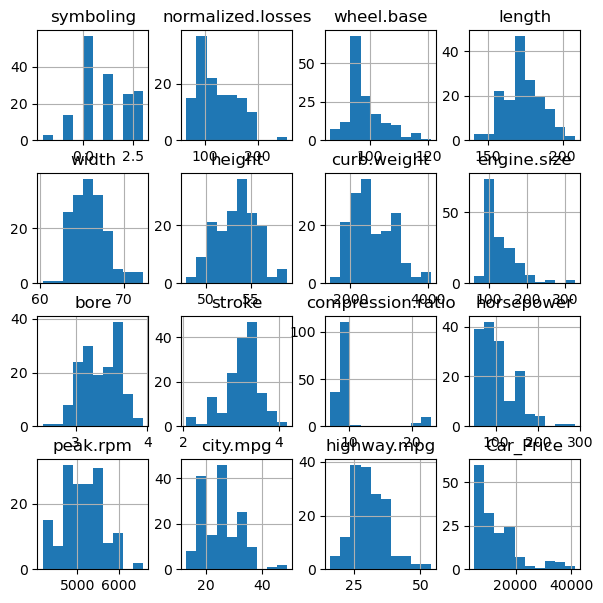

In [3]:
data.hist (figsize=(7,7))

In [4]:
data.isna().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
body.style            0
drive.wheels          0
engine.location       2
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      2
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [5]:
data=data['normalized.losses'].dropna(inplace=True)


# Day 8 Starts here

In [22]:
import pandas as pd
import numpy as np
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error



data = pd.read_csv('winequality-red.csv')
print(data.head())
X = data.drop(columns=['alcohol'])
y = data['alcohol']


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [23]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
data=data.dropna()

In [29]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

In [30]:
# Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_cv_scores)

In [ ]:
# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

In [39]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [33]:
# GridSearchCV
param_grid = {'n_estimators': [10, 100, 200],
              'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_scaled, y)
best_rf = rf_grid.best_estimator_
best_rf_predictions = best_rf.predict(X_test)

In [34]:
# RandomizedSearchCV
param_dist = {'n_estimators': [10, 100, 200],
              'max_depth': [None, 10, 20]}
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
rf_random.fit(X_scaled, y)
best_rf_random = rf_random.best_estimator_
best_rf_random_predictions = best_rf_random.predict(X_test)

C:\Users\punee\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [35]:
# Model Evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_predictions))
best_rf_random_rmse = np.sqrt(mean_squared_error(y_test, best_rf_random_predictions))

In [36]:
# Output results
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Best Random Forest RMSE (GridSearchCV):", best_rf_rmse)
print("Best Random Forest RMSE (RandomizedSearchCV):", best_rf_random_rmse)

Linear Regression RMSE: 0.5874152464696406
Random Forest RMSE: 0.5115351903146244
Best Random Forest RMSE (GridSearchCV): 0.2622218012102871
Best Random Forest RMSE (RandomizedSearchCV): 0.2622218012102871


In [41]:
# Feature Reduction Techniques
#print("LDA Reduced Data:\n", X_lda)
print("PCA Reduced Data:\n", X_pca)


PCA Reduced Data:
 [[-1.89260154 -0.00383946]
 [-1.12944733  1.71828717]
 [-1.01600024  0.7335452 ]
 ...
 [-1.30673024  0.174062  ]
 [-2.40339678  0.84618162]
 [-0.1926568  -0.42381055]]
